In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
try:
    import pcmdpy_gpu as ppy
except:
    import pcmdpy as ppy
import pandas as pd
%matplotlib inline

In [2]:
from scipy.stats import norm

In [3]:
f = ppy.instrument.default_m31_filters()
iso_model = ppy.isochrones.Isochrone_Model(f)
driv = ppy.driver.Driver(iso_model, gpu=ppy.gpu_utils._GPU_ACTIVE)

In [4]:
models = {}

models['mock_1'] = models['mock_9'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.SingleDust(-0.5),
    ppy.sfhmodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.FixedDistance(26.0)
)

models['mock_2'] =  ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.SingleDust(-0.5),
    ppy.sfhmodels.TauModel(np.array([4.5, 1.2])),
    ppy.distancemodels.FixedDistance(26.0)
)

models['mock_3'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.SingleDust(-0.5),
    ppy.sfhmodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mock_4'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.SingleDust(-0.5),
    ppy.sfhmodels.TauModel(np.array([4.5, 1.2])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mock_5'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.2, -0.25),
    ppy.dustmodels.FixedWidthLogNormDust(0.1, -0.5),
    ppy.sfhmodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mock_6'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.NormMDF([-0.25, 0.2]),
    ppy.dustmodels.LogNormDust([-0.5, 0.1]),
    ppy.sfhmodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

tau_SFHbins = ppy.sfhmodels.TauModel(np.array([2.0, 3.0]), iso_step=-1).logSFH

models['mock_7'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.2, -0.25),
    ppy.dustmodels.FixedWidthLogNormDust(0.1, -0.5),
    ppy.sfhmodels.NonParam(tau_SFHbins),
    ppy.distancemodels.FixedDistance(26.0)
)

models['mock_8'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.2, -0.25),
    ppy.dustmodels.FixedWidthLogNormDust(0.1, -0.5),
    ppy.sfhmodels.NonParam(tau_SFHbins),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mismatch_1'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.2, -0.25),  # model SingleFeH with FixedWidthNormMDF
    ppy.dustmodels.SingleDust(-0.5),
    ppy.sfhmodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mismatch_2'] = models['mock_3']  # model FixedWidthNormMDF with SingleFeH

models['mismatch_3'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),  
    ppy.dustmodels.FixedWidthLogNormDust(0.1, -0.5),  # model SingleDust (Fdust=0.5) with FixedWidthLogNormDust
    ppy.sfhmodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mismatch_4'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.SingleDust(-0.5, dust_frac=0.5),  # model FixedWidthLogNormDust with SingleDust (Fdust=0.5)
    ppy.sfhmodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mismatch_5'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.FixedWidthLogNormDust(0.1, -0.5, dust_frac=1.0),  # model Fdust=0.5 with Fdust=1.0
    ppy.sfhmodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mismatch_6'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.SingleDust(-0.5),
    ppy.sfhmodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.FixedDistance(28.0)  # model has wrong distance
)

models['mismatch_7'] = models['mock_3']  # Exposure overestimated in model
models['mismatch_8'] = models['mock_3']  # mock has PSF 10% narrower
models['mismatch_9'] = models['mock_3']  # mock has PSF 10% narrower in F814W

models['mismatch_10'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.3, -0.25),  # model sig=0.1 with sig=0.3
    ppy.dustmodels.SingleDust(-0.5),
    ppy.sfhmodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

In [5]:
run_names = {}
for i in range(1, 10):
    run_names['mock_{:d}'.format(i)] = 'Mock Test {:d}'.format(i)
run_names['mismatch_1'] = 'Model: MDF, Truth: Single [Fe/H]'
run_names['mismatch_2'] = 'Model: Single [Fe/H], Truth: MDF'

run_names['mismatch_3'] = 'Model: LogNorm Dust, Truth: Single Dust'
run_names['mismatch_4'] = 'Model: Single Dust, Truth: LogNorm Dust'
run_names['mismatch_5'] = 'Model: DustFrac = 1, Truth: DustFrac = 0.5'

run_names['mismatch_6'] = 'Model: Dmod=28, Truth: Dmod=26'
run_names['mismatch_7'] = 'Model: Overestimates Exposure Time by 5x'

run_names['mismatch_8'] = 'Model: Overestimates PSF width by 10%'
run_names['mismatch_9'] = 'Model: Overestimates F814W PSF width by 10%'

run_names['mismatch_10'] = 'Model: Overestimates MDF width (0.3 vs 0.1)'

In [6]:
models.keys()

dict_keys(['mock_1', 'mock_9', 'mock_2', 'mock_3', 'mock_4', 'mock_5', 'mock_6', 'mock_7', 'mock_8', 'mismatch_1', 'mismatch_2', 'mismatch_3', 'mismatch_4', 'mismatch_5', 'mismatch_6', 'mismatch_7', 'mismatch_8', 'mismatch_9', 'mismatch_10'])

In [7]:
res = {}
for k in models.keys():
    try:
        res[k] = ppy.results.ResultsPlotter('results/paper1_{:s}.csv'.format(k), true_model=models[k], run_name=run_names[k])
    except Exception as e:
        print('Error in {:s}'.format(k))
        print(e)

In [8]:
res['mock_1_old'] = ppy.results.ResultsPlotter('results/paper1_mock_1_old.csv', true_model=models['mock_1'], run_name='Mock 1 Old')
models['mock_1_old'] = models['mock_1']
run_names['mock_1_old'] = 'Mock 1 Old'

In [9]:
res['mock_9_old'] = ppy.results.ResultsPlotter('results/paper1_mock_9_old.csv', true_model=models['mock_9'], run_name='Mock 9 Old')
models['mock_9_old'] = models['mock_9']
run_names['mock_9_old'] = 'Mock 9 Old'

In [12]:
def plot_sets(run_names, chains_only=False, dmod_true=24.42, nonparam=False):
    p_max = np.max([models[k]._num_params for k in run_names])
    nr = np.max([models[k]._num_params for k in run_names])
    if np.any([isinstance(models[k].sfh_model, ppy.sfhmodels.NonParam) for k in run_names]):
    nr = 0 + p_max
    if np.any([isinstance(models[k].sfh_model, ppy.agemodels.NonParam) for k in run_names]):
        nr += 1  # for Npix
    if not chains_only:
        nr += 3
    nx = len(run_names)
    fs = (5+3*nx, 2*nr)
    fig, axes = plt.subplots(ncols=nx, nrows=nr, figsize=fs, sharex=True, sharey='row')
    if nx == 1:
        axes = np.array([axes])
    for i, n in enumerate(run_names):
        results = res[n]
        plot_axes = list(axes[:, i])
        if (models[n].p_distance == 0) & (p_max > models[n]._num_params):
            plot_axes.pop(models[n].p_total)
        results.plot_chains(axes=plot_axes, chains_only=chains_only)
    plt.tight_layout()
    return fig, axes

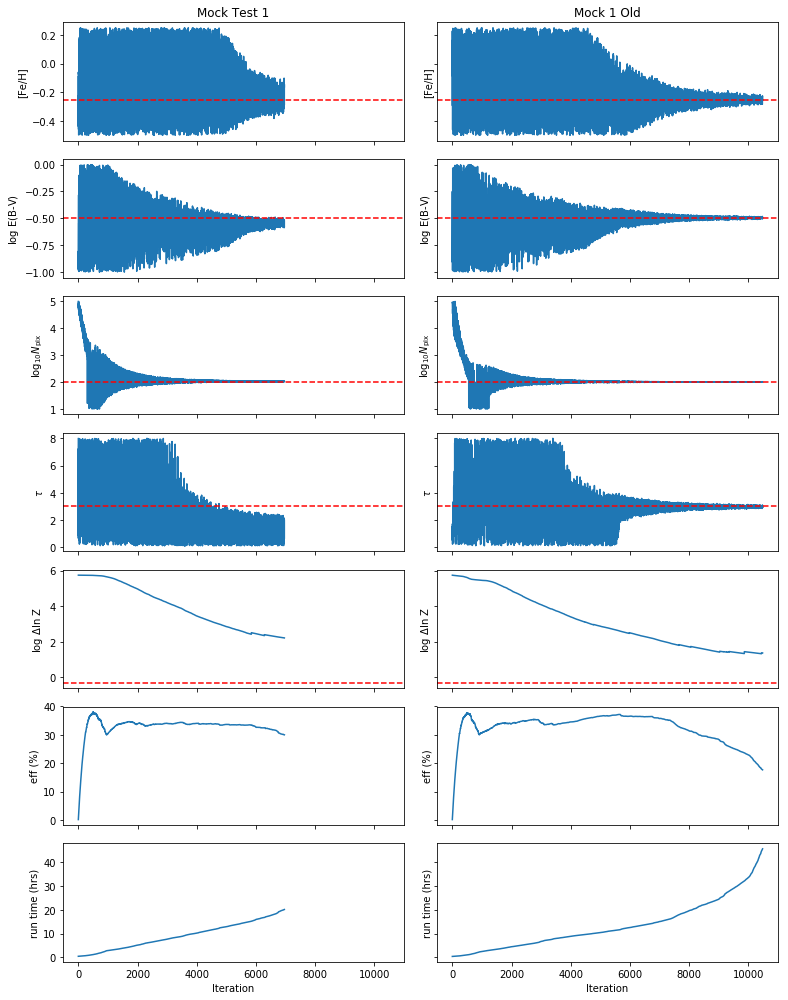

In [13]:
fig, axes = plot_sets(['mock_1', 'mock_1_old'], chains_only=False);

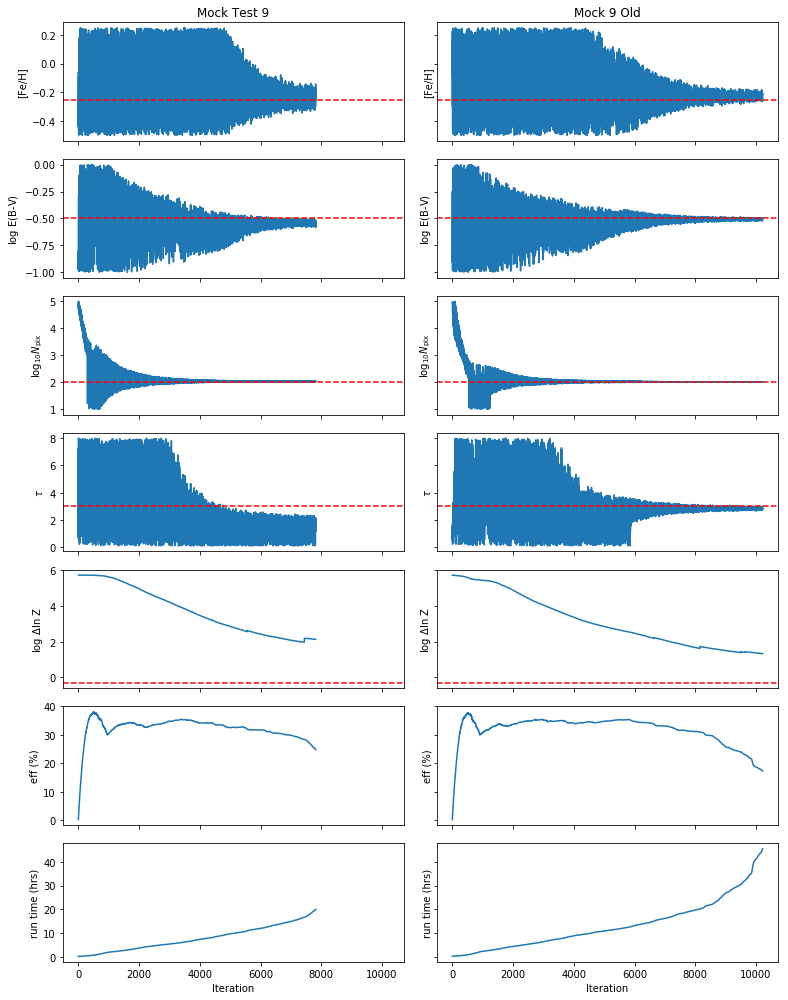

In [14]:
fig, axes = plot_sets(['mock_9', 'mock_9_old'], chains_only=False);

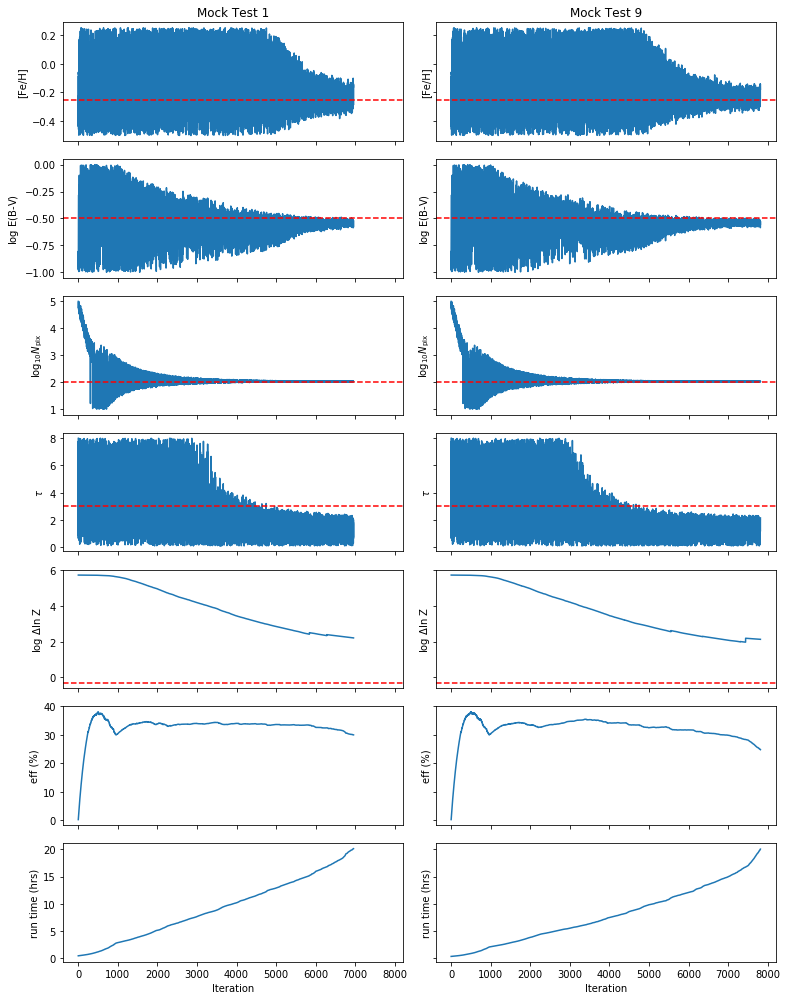

In [15]:
fig, axes = plot_sets(['mock_1', 'mock_9'], chains_only=False);

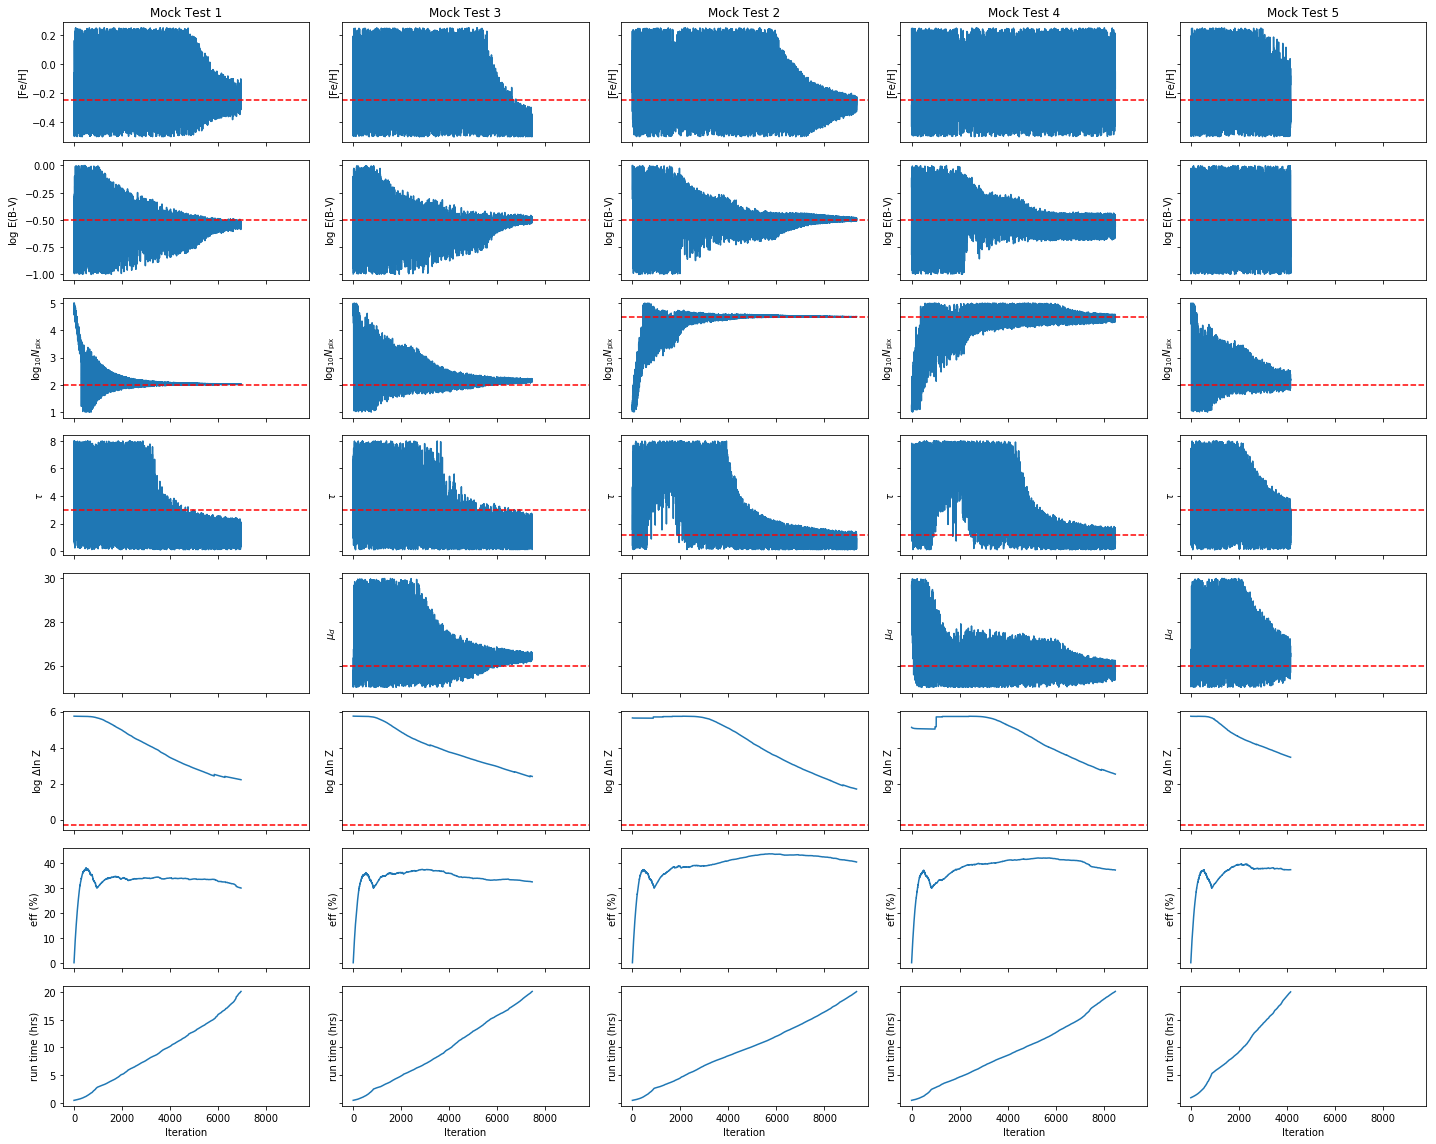

In [16]:
fig, axes = plot_sets(['mock_1', 'mock_3', 'mock_2', 'mock_4', 'mock_5'], chains_only=False);

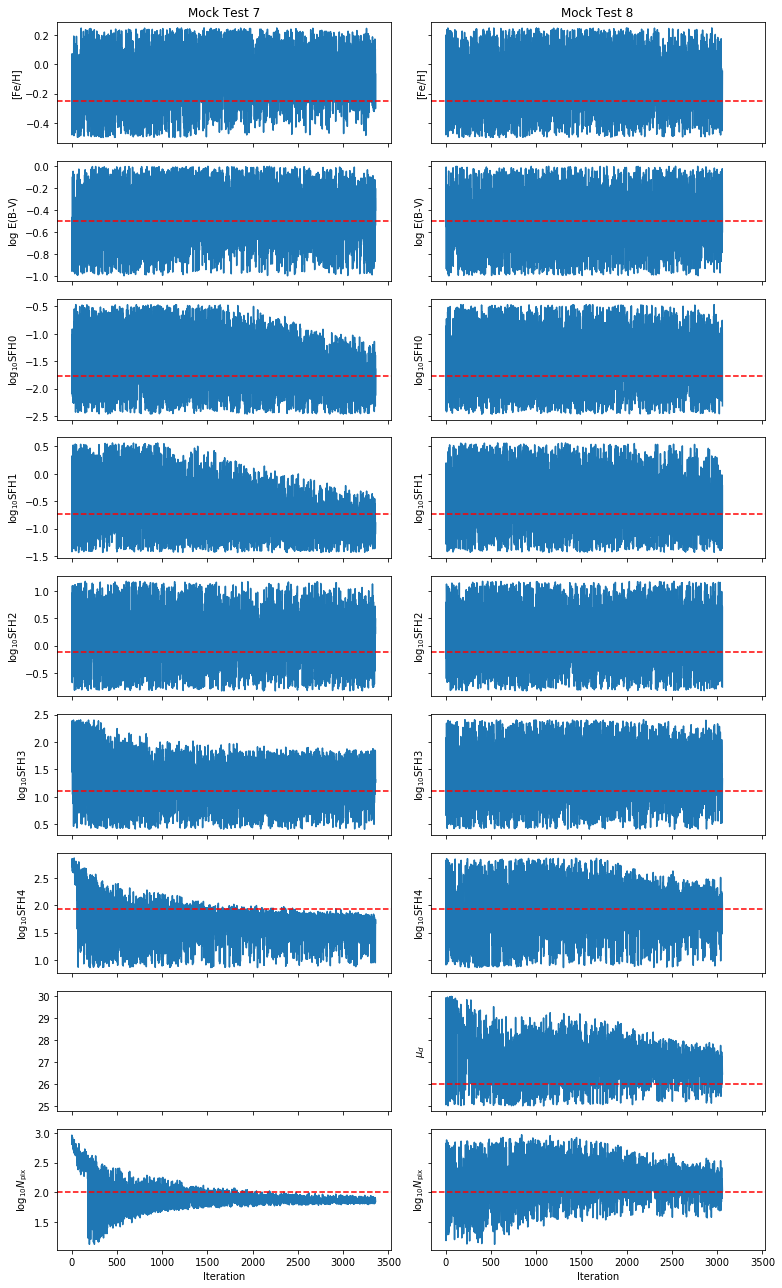

In [17]:
fig, axes = plot_sets(['mock_7', 'mock_8'], chains_only=True);

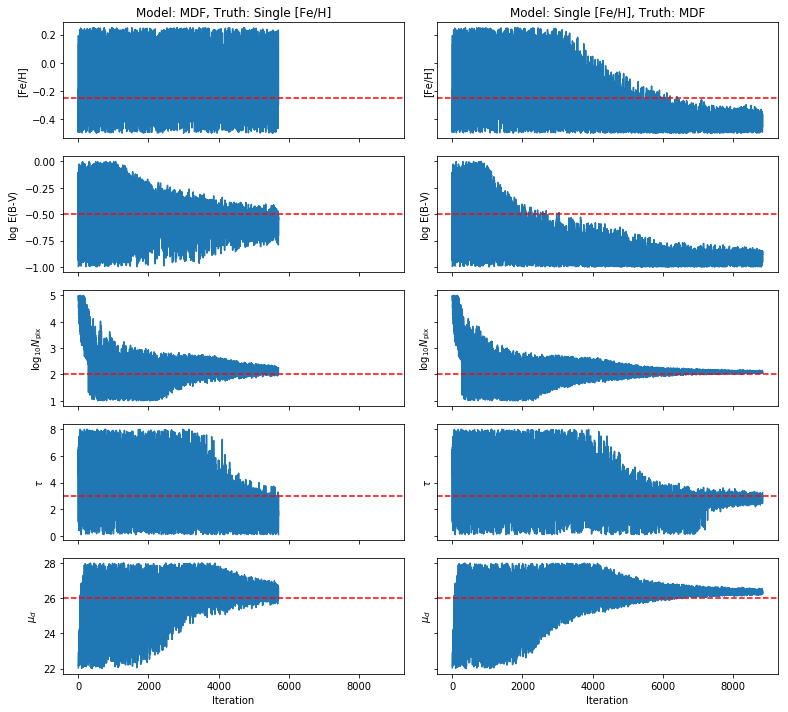

In [18]:
fig, axes = plot_sets(['mismatch_1', 'mismatch_2'], chains_only=True);

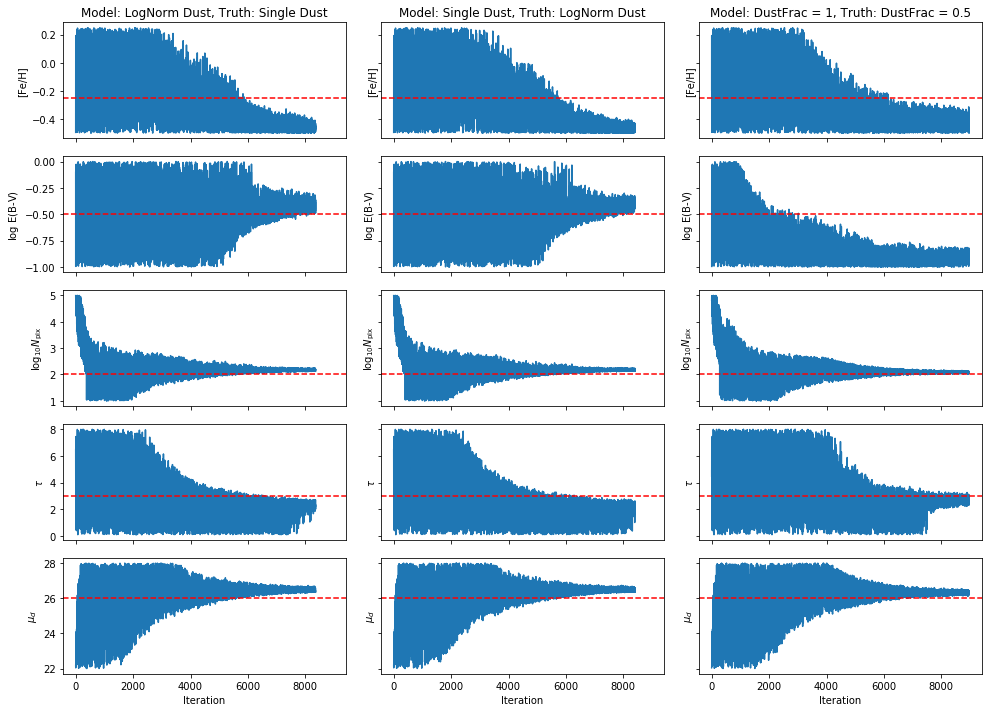

In [19]:
fig, axes = plot_sets(['mismatch_3', 'mismatch_4', 'mismatch_5'], chains_only=True);

KeyError: 'mismatch_7'

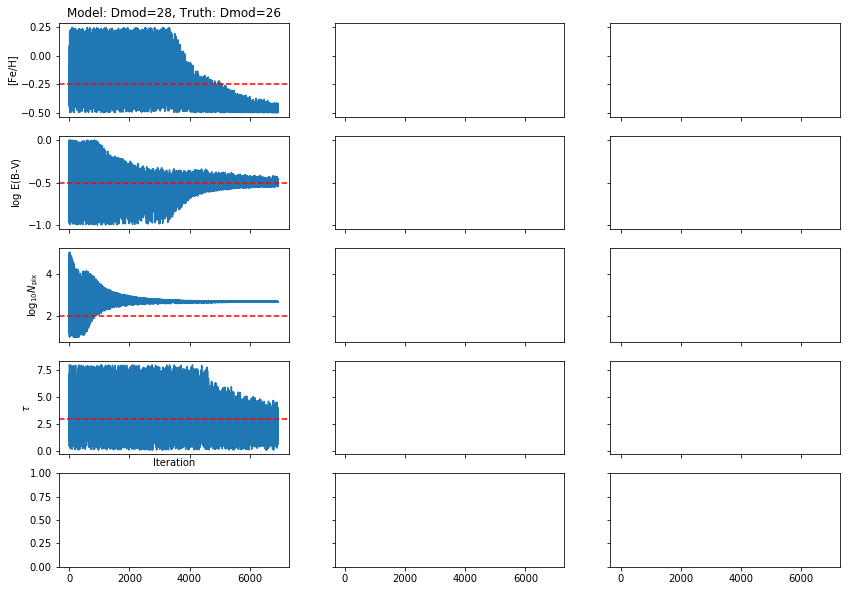

In [50]:
fig, axes = plot_sets(['mismatch_6', 'mismatch_7', 'mismatch_8'], chains_only=True);

In [20]:
def compare_model_to_truth(run_name, Nim=512, bins=None):
    pcmd_true, _ = driv.simulate(models[run_name], Nim, fixed_seed=True)
    pcmd_model, _ = driv.simulate(res[run_name].best_model, Nim, fixed_seed=True)
    fig, axes = plt.subplots(ncols=3, figsize=(18, 5), sharex=True, sharey=True)
    _, bins, norm = ppy.plotting.plot_pcmd(pcmd_true, bins=bins, ax=axes[0])
    ppy.plotting.plot_pcmd_residual(pcmd_true, pcmd_model, like_mode=3, bins=bins, ax=axes[1], title='Residual')
    ppy.plotting.plot_pcmd(pcmd_model, ax=axes[2], bins=bins, norm=norm)
    for a in axes:
        ppy.plotting.plot_isochrone(iso_model, axes=a, dmod=26.0, mag_system='vega')
    return pcmd_true, pcmd_model, bins, fig, axes 

In [21]:
bins = [np.arange(10, 55, 0.05), np.arange(-1.5, 5.6, 0.05)]

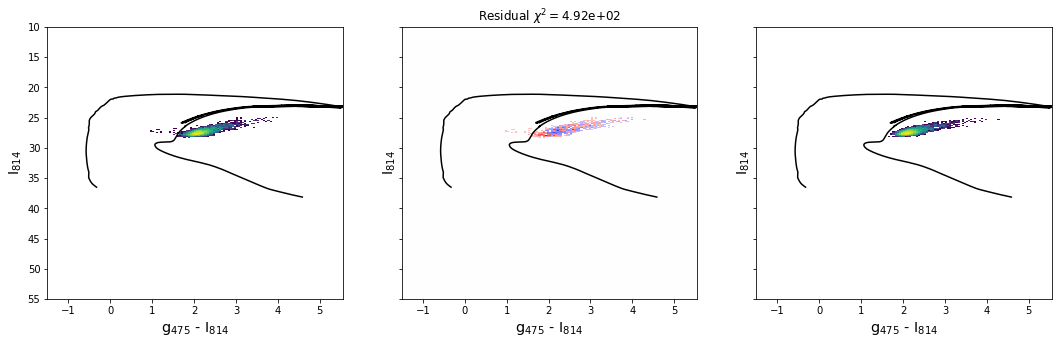

In [22]:
pcmd_true, pcmd_model, bins, fig, axes =  compare_model_to_truth('mock_1', bins=bins, Nim=128)

In [28]:
f[0].counts_to_mag(1e-3)

41.8029857125118

(array([ 1337.,  3600.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11447.]),
 array([30.997437, 33.82799 , 36.658546, 39.4891  , 42.319656, 45.15021 ,
        47.980766, 50.81132 , 53.641876, 56.47243 , 59.302986],
       dtype=float32),
 <a list of 10 Patch objects>)

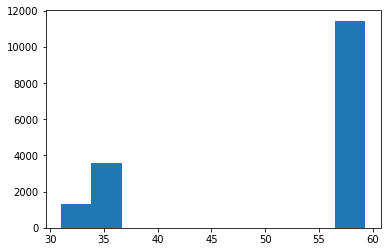

In [25]:
plt.hist(pcmd_model[0])

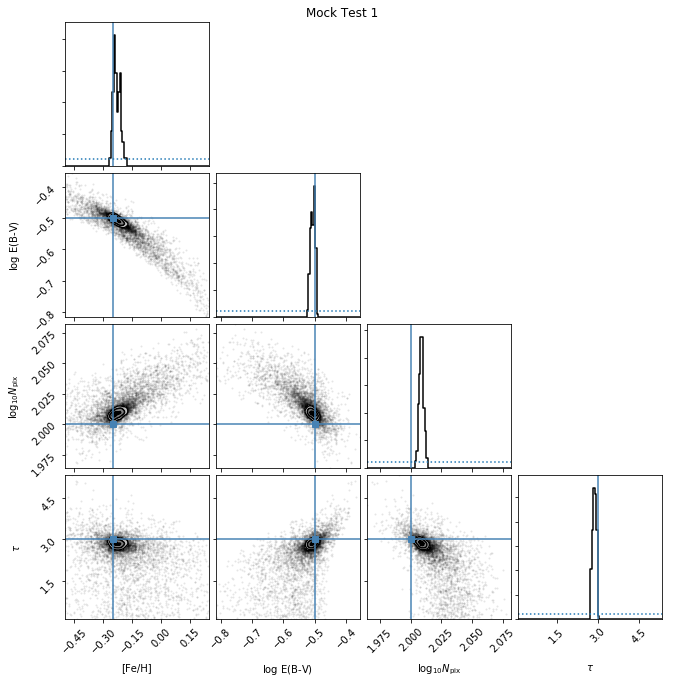

In [36]:
r = res['mock_1']
r.plot_corner(burn=4000, bins=100, weight=True, full_range=False);

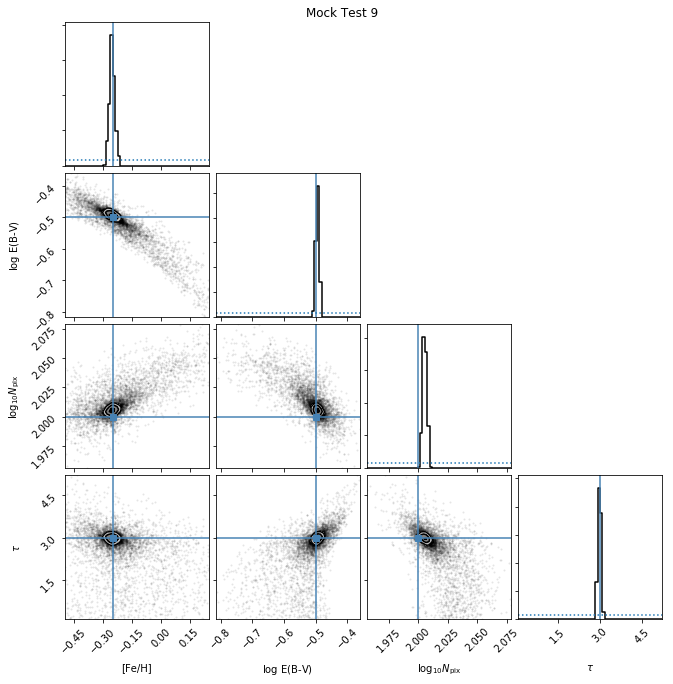

In [42]:
r = res['mock_9']
r.plot_corner(burn=4000, bins=60, weight=True, full_range=False);

In [50]:
pcmd_true

array([[22.117897 , 22.095848 , 22.157034 , ..., 22.09481  , 22.119596 ,
        22.15181  ],
       [ 3.4711094,  3.4685955,  3.4481773, ...,  3.488491 ,  3.4782028,
         3.4524956]], dtype=float32)

In [51]:
pcmd_model

array([[59.302986 , 59.302986 , 59.302986 , ..., 59.302986 , 59.302986 ,
        33.550407 ],
       [ 0.7448845,  0.7448845,  0.7448845, ...,  0.7448845,  0.7448845,
        26.497463 ]], dtype=float32)

In [13]:
driv.initialize_data(pcmd_true, bins=bins)

In [24]:
_, hess_model, err_model = ppy.utils.make_hess(pcmd_model, bins=bins)
combined_var = (driv.err_data**2. + err_model**2.)
# combined_var[(driv.hess_data + hess_model) <= 0.0] = 0.0

In [25]:
hess_diff = (hess_model - driv.hess_data)

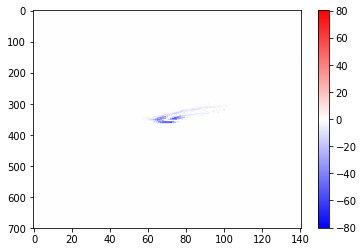

In [42]:
x = -np.abs((np.sign(hess_diff) * (hess_diff**2 / (2.*combined_var)))[0])
plt.imshow(x, aspect='auto', cmap='bwr', norm=mpl.colors.Normalize(vmin=-np.max(np.abs(x)), vmax=np.max(np.abs(x))))
plt.colorbar()

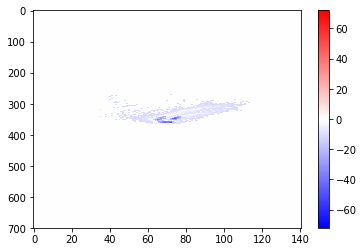

In [43]:
x = -np.abs((np.sign(hess_diff) * norm.logpdf(hess_model, loc=driv.hess_data, scale=np.sqrt(combined_var)))[0])
plt.imshow(x, aspect='auto', cmap='bwr', norm=mpl.colors.Normalize(vmin=-np.max(np.abs(x)), vmax=np.max(np.abs(x))))
plt.colorbar()

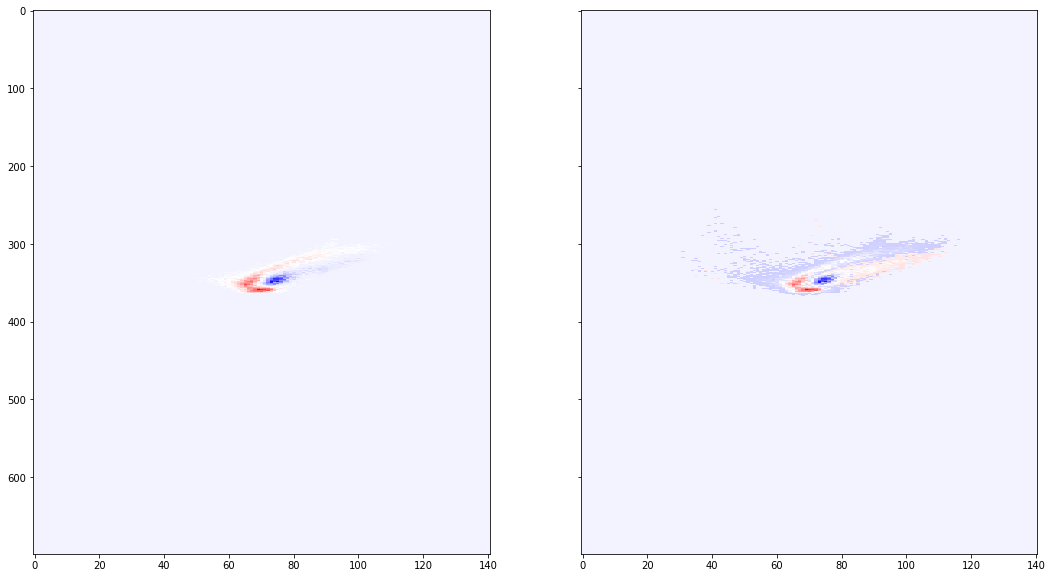

In [41]:
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(18, 10))
axes[0].imshow(driv.loglike_map(pcmd_model, like_mode=2, signed=True)[0], aspect='auto', cmap='bwr')
axes[1].imshow(driv.loglike_map(pcmd_model, like_mode=3, signed=True)[0], aspect='auto', cmap='bwr')
